步骤1.1 导入数据

In [13]:
import pandas as pd

# --- 参数配置 ---
# 使用相对路径，这样无论项目文件夹在哪里，代码都能正常工作
# '..' 表示从当前文件(preprocessing.ipynb)所在的scripts/目录，返回到上一级项目根目录
# 然后再进入 'data/' 目录找到文件
file_path = '../data/20250725_204056_20250718_JDL_report_Report..xlsx'

# 再次确认工作表的准确名称，这里假设之前的名称是正确的
sheet_to_read = '20250725_204056_20250718_JDL_re' 

print(f"正在尝试从相对路径读取文件: {file_path}")

# --- 数据读取与错误处理 ---
try:
    df = pd.read_excel(file_path, sheet_name=sheet_to_read)

    # 使用 f-string 格式化打印成功信息
    print(f"✅ 成功从文件的工作表 '{sheet_to_read}' 中导入数据！")
    print(f"数据维度（行, 列）: {df.shape}")
    
    # 在 Jupyter Notebook 中，使用 display() 可以获得更漂亮的表格输出
    display(df.head())

except FileNotFoundError:
    print(f"❌ 错误：文件未找到！")
    print(f"请再次检查相对路径是否正确: '{file_path}'")

except ValueError as e:
    print(f"❌ 错误：工作表名 '{sheet_to_read}' 不存在！")
    print("提示：请用 Excel 打开文件，确认工作表的准确名称。")

except Exception as e:
    print(f"❌ 发生了一个未知错误: {e}")

正在尝试从相对路径读取文件: ../data/20250725_204056_20250718_JDL_report_Report..xlsx
✅ 成功从文件的工作表 '20250725_204056_20250718_JDL_re' 中导入数据！
数据维度（行, 列）: (111770, 59)


,E.LFQMethod,R.FileName,R.Fraction,R.Condition,R.Replicate,R.Label,PG.GroupLabel,PG.ProteinAccessions,PG.ProteinGroups,PG.Cscore,...,EG.UsedForPeptideQuantity,EG.UsedForProteinGroupQuantity,EG.Cscore,EG.NormalizedCscore,FG.Charge,FG.IntMID,FG.LabeledSequence,FG.PrecMz,FG.PrecMzCalibrated,FG.Quantity
0,MaxLFQ,JDL_1_Slot2-10_1_20405,NaN,Not Defined,1,JDL_1_Slot2-10_1_20405.d,A0A140LI88,A0A140LI88,A0A140LI88,26.834951,...,True,True,15.915181,15.899608,2,_NSEDEEQYIGK_,_NSEDEEQYIGK_,656.288574,656.288486,326.186554
1,MaxLFQ,JDL_1_Slot2-10_1_20405,NaN,Not Defined,1,JDL_1_Slot2-10_1_20405.d,A2A432,A2A432,A2A432,52.557938,...,True,True,27.509775,27.498368,2,_PAELIAKYVDSK_,_PAELIAKYVDSK_,667.371765,667.371651,797.563416
2,MaxLFQ,JDL_1_Slot2-10_1_20405,NaN,Not Defined,1,JDL_1_Slot2-10_1_20405.d,A2A432,A2A432,A2A432,52.557938,...,True,True,44.077770,44.072317,2,_LITYLDQTTQK_,_LITYLDQTTQK_,662.361389,662.361420,440.635742
3,MaxLFQ,JDL_1_Slot2-10_1_20405,NaN,Not Defined,1,JDL_1_Slot2-10_1_20405.d,A2A432,A2A432,A2A432,52.557938,...,True,True,34.701088,34.692265,2,_GLNSLLDENR_,_GLNSLLDENR_,565.793640,565.794214,270.908386
4,MaxLFQ,JDL_1_Slot2-10_1_20405,NaN,Not Defined,1,JDL_1_Slot2-10_1_20405.d,A2A432,A2A432,A2A432,52.557938,...,True,True,45.404552,45.399576,2,_ETVEEQASTTER_,_ETVEEQASTTER_,690.317871,690.317367,316.155487


步骤1.2 数据清洗与过滤

步骤1.2.1 移除伪数据库匹配

In [14]:
# 假设您已成功导入数据，并存放在名为 df 的 DataFrame 中

print("--- 开始数据清洗步骤 1.2.1: 移除伪数据库匹配 (Decoys) ---")

# 1. 查看过滤前的数据维度
print(f"原始数据维度 (行, 列): {df.shape}")

# 2. 查看 EG.IsDecoy 列的分布情况
# 这会告诉我们有多少是真实的(False)，有多少是诱饵(True)
print("\n过滤前 'EG.IsDecoy' 列的值分布：")
print(df['EG.IsDecoy'].value_counts())

# 3. 执行过滤操作
# 创建一个新的 DataFrame，只包含 'EG.IsDecoy' 为 False 的行。
# 加上 .copy() 是一个好习惯，可以避免后续操作出现警告，确保 df_no_decoys 是一个独立的副本。
df_no_decoys = df[df['EG.IsDecoy'] == False].copy()

# 4. 验证过滤结果
print("\n--- 过滤完成 ---")
print(f"移除 Decoy 后的数据维度 (行, 列): {df_no_decoys.shape}")

# 5. 再次检查 'EG.IsDecoy' 列，确认所有的 True 都已被移除
print("\n过滤后 'EG.IsDecoy' 列的值分布：")
# 如果操作成功，这里应该只会显示 False
print(df_no_decoys['EG.IsDecoy'].value_counts())

print("\n✅ Decoy 匹配已成功移除！")

--- 开始数据清洗步骤 1.2.1: 移除伪数据库匹配 (Decoys) ---
原始数据维度 (行, 列): (111770, 59)

过滤前 'EG.IsDecoy' 列的值分布：
EG.IsDecoy
False    111770
Name: count, dtype: int64

--- 过滤完成 ---
移除 Decoy 后的数据维度 (行, 列): (111770, 59)

过滤后 'EG.IsDecoy' 列的值分布：
EG.IsDecoy
False    111770
Name: count, dtype: int64

✅ Decoy 匹配已成功移除！


步骤1.2.2 移除已知污染物

In [15]:
# 假设 df_no_decoys 是上一步移除 Decoy 后得到的 DataFrame

print("\n--- 开始数据清洗步骤 1.2.2: 移除污染物 (Contaminants) ---")

# 1. 查看过滤前的数据维度
print(f"过滤前维度 (行, 列): {df_no_decoys.shape}")

# 2. 统计有多少行是污染物
# .str.startswith('CON__') 会返回一个布尔序列
# .sum() 会将 True (计为1) 和 False (计为0) 相加，从而得到污染物的总行数
contaminant_rows = df_no_decoys['PG.ProteinAccessions'].str.startswith('CON__', na=False).sum()
print(f"检测到 {contaminant_rows} 行数据属于污染物条目。")

# 3. 执行过滤操作
# 我们要保留所有 *不* 以 'CON__' 开头的行。
# 波浪号 '~' 在 Pandas 中代表 '取反' (NOT) 的操作。
# 同样，使用 .copy() 是一个好习惯。
df_no_contaminants = df_no_decoys[~df_no_decoys['PG.ProteinAccessions'].str.startswith('CON__', na=False)].copy()

# 4. 验证过滤结果
print("\n--- 过滤完成 ---")
print(f"移除污染物后的数据维度 (行, 列): {df_no_contaminants.shape}")

# 5. 再次检查，确认污染物已被移除
remaining_contaminants = df_no_contaminants['PG.ProteinAccessions'].str.startswith('CON__', na=False).sum()
print(f"过滤后剩余的污染物行数: {remaining_contaminants}") # 这个数字应该是 0

print("\n✅ 污染物条目已成功移除！")


--- 开始数据清洗步骤 1.2.2: 移除污染物 (Contaminants) ---
过滤前维度 (行, 列): (111770, 59)
检测到 0 行数据属于污染物条目。

--- 过滤完成 ---
移除污染物后的数据维度 (行, 列): (111770, 59)
过滤后剩余的污染物行数: 0

✅ 污染物条目已成功移除！


步骤1.2.3 基于Q-value值进行过滤

In [16]:
# 假设 df_no_contaminants 是上一步移除污染物后得到的 DataFrame

print("\n--- 开始数据清洗步骤 1.2.3: 基于 PG.Qvalue < 0.01 进行过滤 ---")

# 1. 查看过滤前的数据维度
print(f"过滤前维度 (行, 列): {df_no_contaminants.shape}")

# 2. 查看 PG.Qvalue 的分布情况（可选，但有助于理解数据）
# .describe() 可以给出该列的统计摘要，如均值、最大值、最小值、四分位数等
print("\n过滤前 'PG.Qvalue' 列的统计摘要：")
display(df_no_contaminants['PG.Qvalue'].describe())

# 3. 执行过滤操作
# 定义我们的阈值
QVALUE_THRESHOLD = 0.01

# 创建一个新的 DataFrame，只包含 'PG.Qvalue' 小于阈值的行。
# 同样，使用 .copy() 是一个好习惯。
df_filtered = df_no_contaminants[df_no_contaminants['PG.Qvalue'] < QVALUE_THRESHOLD].copy()

# 4. 验证过滤结果
print("\n--- 过滤完成 ---")
print(f"按 PG.Qvalue < {QVALUE_THRESHOLD} 过滤后的数据维度 (行, 列): {df_filtered.shape}")

# 5. 再次检查，确认所有保留的行的 PG.Qvalue 都符合标准
# 我们可以通过查看过滤后 PG.Qvalue 的最大值来验证
max_qvalue_after_filter = df_filtered['PG.Qvalue'].max()
print(f"过滤后 'PG.Qvalue' 的最大值: {max_qvalue_after_filter}") # 这个值应该小于 0.01

print("\n✅ 已成功按 Q-value 阈值进行过滤！")
print("🎉 阶段 1.2 的所有数据清洗与过滤任务已全部完成！")


--- 开始数据清洗步骤 1.2.3: 基于 PG.Qvalue < 0.01 进行过滤 ---
过滤前维度 (行, 列): (111770, 59)

过滤前 'PG.Qvalue' 列的统计摘要：


count    111770.000000
mean          0.000027
std           0.000323
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           0.009945
Name: PG.Qvalue, dtype: float64


--- 过滤完成 ---
按 PG.Qvalue < 0.01 过滤后的数据维度 (行, 列): (111770, 59)
过滤后 'PG.Qvalue' 的最大值: 0.00994454006502199

✅ 已成功按 Q-value 阈值进行过滤！
🎉 阶段 1.2 的所有数据清洗与过滤任务已全部完成！


步骤1.3 实验重复性检验

检查df_filtered数据是否可用

In [39]:
# Cell 2: 准备要分析的数据
# 假设 df_filtered 是您在之前的步骤中，经过了去Decoy、去污染物、Q-value过滤后得到的最终数据集。

# 确认一下 df_filtered 是否存在且有数据
if 'df_filtered' in locals() and not df_filtered.empty:
    display(df_filtered.head())
    print(f"数据准备就绪！df_filtered 包含 {df_filtered.shape[0]} 行数据。")
else:
    print("❌ 错误：请先运行前面的数据清洗步骤，以生成 df_filtered 数据集！")

,E.LFQMethod,R.FileName,R.Fraction,R.Condition,R.Replicate,R.Label,PG.GroupLabel,PG.ProteinAccessions,PG.ProteinGroups,PG.Cscore,...,EG.UsedForPeptideQuantity,EG.UsedForProteinGroupQuantity,EG.Cscore,EG.NormalizedCscore,FG.Charge,FG.IntMID,FG.LabeledSequence,FG.PrecMz,FG.PrecMzCalibrated,FG.Quantity
0,MaxLFQ,JDL_1_Slot2-10_1_20405,NaN,Not Defined,1,JDL_1_Slot2-10_1_20405.d,A0A140LI88,A0A140LI88,A0A140LI88,26.834951,...,True,True,15.915181,15.899608,2,_NSEDEEQYIGK_,_NSEDEEQYIGK_,656.288574,656.288486,326.186554
1,MaxLFQ,JDL_1_Slot2-10_1_20405,NaN,Not Defined,1,JDL_1_Slot2-10_1_20405.d,A2A432,A2A432,A2A432,52.557938,...,True,True,27.509775,27.498368,2,_PAELIAKYVDSK_,_PAELIAKYVDSK_,667.371765,667.371651,797.563416
2,MaxLFQ,JDL_1_Slot2-10_1_20405,NaN,Not Defined,1,JDL_1_Slot2-10_1_20405.d,A2A432,A2A432,A2A432,52.557938,...,True,True,44.077770,44.072317,2,_LITYLDQTTQK_,_LITYLDQTTQK_,662.361389,662.361420,440.635742
3,MaxLFQ,JDL_1_Slot2-10_1_20405,NaN,Not Defined,1,JDL_1_Slot2-10_1_20405.d,A2A432,A2A432,A2A432,52.557938,...,True,True,34.701088,34.692265,2,_GLNSLLDENR_,_GLNSLLDENR_,565.793640,565.794214,270.908386
4,MaxLFQ,JDL_1_Slot2-10_1_20405,NaN,Not Defined,1,JDL_1_Slot2-10_1_20405.d,A2A432,A2A432,A2A432,52.557938,...,True,True,45.404552,45.399576,2,_ETVEEQASTTER_,_ETVEEQASTTER_,690.317871,690.317367,316.155487


数据准备就绪！df_filtered 包含 111770 行数据。


步骤1.3.1 蛋白质组和肽段数目重复性检验

（1）导入函数

In [43]:
# 确保已经安装了 matplotlib-venn
# !pip install matplotlib-venn

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib_venn import venn3, venn2 # 导入韦恩图绘制函数

#用于统计有多少个实验名称的函数
def get_sample_names(dataframe, run_col='R.FileName'): 
    """
    从数据框中提取并打印所有唯一的样本名称。

    参数 (Parameters):
    ----------
    dataframe : pd.DataFrame
        您的数据框 (例如，df_filtered)。
    run_col : str, optional
        包含样本名称的列 (默认为 'R.FileName')。

    返回 (Returns):
    -------
    list
        一个包含所有唯一样本名称的列表。
    """
    try:
        # 获取唯一值并转换为列表
        sample_names = dataframe[run_col].unique().tolist()
        
        print(f"✅ 在列 '{run_col}' 中发现以下 {len(sample_names)} 个唯一样本名称:")
        # 为了方便复制粘贴，我们逐行打印
        for name in sample_names:
            print(f"'{name}'")
            
        return sample_names
    
    except KeyError:
        print(f"❌ 错误：列 '{run_col}' 在数据框中未找到！请检查列名。")
        return [] # 返回一个空列表


#用于绘图的函数
def assess_reproducibility(dataframe,    
                           run_col='R.FileName', 
                           protein_col='PG.ProteinGroups', 
                           peptide_col='PEP.StrippedSequence',
                           plot_title_prefix='',
                           draw_venn=True,
                           sample_whitelist=None):
    """
    评估实验重复性，功能包括：
    1. 统计并用条形图可视化每个样本中鉴定到的蛋白和肽段数量。
    2. 可选绘制韦恩图展示指定样本子集(2或3个)的ID重叠情况。

    参数 (Parameters):
    ----------
    dataframe : pd.DataFrame
        清洗和过滤后的输入数据框。
    run_col : str, optional
        用于区分不同样本/运行的列名 (默认为 'R.FileName')。
    protein_col : str, optional
        用于唯一标识蛋白质组的列名 (默认为 'PG.ProteinGroups')。
    peptide_col : str, optional
        用于唯一标识肽段的列名 (默认为 'PEP.StrippedSequence')。
    plot_title_prefix : str, optional
        添加到图表标题前的前缀，用于区分不同实验 (默认为空)。
    draw_venn : bool, optional
        是否尝试绘制韦恩图 (默认为 True)。
    sample_whitelist : list or None, optional
        一个包含样本名称的列表。如果提供，则只对列表中的样本进行分析。
        如果为 None，则分析 `dataframe` 中的所有样本 (默认为 None)。

    返回 (Returns):
    -------
    pd.DataFrame or None
        一个包含被分析样本及其蛋白/肽段计数的摘要数据框。如果无数据可分析则返回 None。
    """
    
    # --- 1. 根据白名单（如果提供）筛选数据 ---
    if sample_whitelist:
        print(f"ℹ️ 检测到样本白名单，将只分析以下样本: {sample_whitelist}")
        # 使用 .copy() 避免后续操作影响原始传入的dataframe
        analysis_df = dataframe[dataframe[run_col].isin(sample_whitelist)].copy()
    else:
        # 如果没有白名单，就分析全部数据
        analysis_df = dataframe.copy() 
        
    if analysis_df.empty:
        print("❌ 错误：根据白名单筛选后，没有剩余数据可供分析。请检查白名单中的样本名称是否正确。")
        return None

    print(f"\n--- 正在对 {len(analysis_df[run_col].unique())} 个样本进行ID计数评估 ---")
    
    # --- 2. 计算统计数据并准备韦恩图集合 ---
    protein_sets = {}
    peptide_sets = {}
    
    try:
        # 使用 groupby().agg() 一次性完成计数和集合的提取
        summary_agg = analysis_df.groupby(run_col).agg(
            protein_count=(protein_col, 'nunique'),
            peptide_count=(peptide_col, 'nunique'),
            protein_set=(protein_col, lambda x: set(x.unique())),
            peptide_set=(peptide_col, lambda x: set(x.unique()))
        )
        
        # 将集合数据存入字典，并从摘要表中移除
        for idx, row in summary_agg.iterrows():
            protein_sets[idx] = row['protein_set']
            peptide_sets[idx] = row['peptide_set']
        
        # 获得最终的、只包含计数的摘要表
        summary_stats = summary_agg[['protein_count', 'peptide_count']].reset_index()
        summary_stats = summary_stats.rename(columns={run_col: '样本名称'})
        
        print("\n统计摘要表：")
        display(summary_stats)

    except KeyError as e:
        print(f"❌ 错误：列名未找到！请检查输入的列名参数是否正确。错误信息: {e}")
        return None

    # --- 3. 绘制条形图 ---
    sns.set_theme(style="whitegrid")
    plt.rcParams['font.sans-serif'] = ['SimHei']
    plt.rcParams['axes.unicode_minus'] = False
    
    # 绘制蛋白组数量图
    plt.figure(figsize=(12, 6))
    ax1 = sns.barplot(data=summary_stats, x='样本名称', y='protein_count', palette='viridis')
    title_text = f'{plot_title_prefix}各样本鉴定到的蛋白组数量'.strip()
    ax1.set_title(title_text, fontsize=16)
    ax1.set_ylabel('唯一蛋白组数量', fontsize=12)
    ax1.set_xlabel('样本', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    for p in ax1.patches:
        ax1.annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 9), textcoords='offset points')
    plt.tight_layout()
    plt.show()

    # 绘制肽段数量图
    plt.figure(figsize=(12, 6))
    ax2 = sns.barplot(data=summary_stats, x='样本名称', y='peptide_count', palette='plasma')
    title_text = f'{plot_title_prefix}各样本鉴定到的肽段数量'.strip()
    ax2.set_title(title_text, fontsize=16)
    ax2.set_ylabel('唯一肽段数量', fontsize=12)
    ax2.set_xlabel('样本', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    for p in ax2.patches:
        ax2.annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 9), textcoords='offset points')
    plt.tight_layout()
    plt.show()

    # --- 4. 绘制韦恩图 ---
    if draw_venn:
        sample_names = list(protein_sets.keys())
        num_samples = len(sample_names)
        
        print("\n--- 正在尝试绘制韦恩图以展示ID重叠情况 ---")

        # 绘制蛋白质韦恩图
        if num_samples == 3:
            plt.figure(figsize=(10, 8))
            venn3([protein_sets[s] for s in sample_names], set_labels=sample_names, set_colors=('skyblue', 'lightgreen', 'salmon'), alpha=0.7)
            title_text = f'{plot_title_prefix}蛋白质组鉴定重叠情况 (3个样本)'.strip()
            plt.title(title_text, fontsize=16)
            plt.show()
        elif num_samples == 2:
            plt.figure(figsize=(8, 6))
            venn2([protein_sets[s] for s in sample_names], set_labels=sample_names, set_colors=('skyblue', 'lightgreen'), alpha=0.7)
            title_text = f'{plot_title_prefix}蛋白质组鉴定重叠情况 (2个样本)'.strip()
            plt.title(title_text, fontsize=16)
            plt.show()
        else:
            print(f"ℹ️ 提示：当前分析的样本数量为 {num_samples}，不适合绘制标准的2或3环韦恩图。将跳过韦恩图绘制。")
    
    return summary_stats

（2）检查有多少个组别

In [44]:
# ======================================================================
# Cell 2: 探索步骤 - 获取可用的样本名称
# ======================================================================

# 假设 df_filtered 是您已经清洗好的数据
all_available_samples = get_sample_names(df_filtered)

✅ 在列 'R.FileName' 中发现以下 3 个唯一样本名称:
'JDL_1_Slot2-10_1_20405'
'JDL_2_Slot2-11_1_20406'
'JDL_3_Slot2-12_1_20407'


### 函数使用方法

本项目定义了两个核心的辅助函数：`get_sample_names` 和 `assess_reproducibility`。

#### 1. `get_sample_names` 函数

*   **功能**: 从一个数据框（DataFrame）中提取并列出所有唯一的样本名称，方便后续选择和分析。
*   **使用方法**:
    ```python
    # 假设 df_filtered 是您已经清洗好的数据
    all_available_samples = get_sample_names(df_filtered)
    ```
    运行后，它会打印出所有可用的样本名列表。

#### 2. `assess_reproducibility` 函数

*   **功能**:
    这是一个多功能的重复性评估工具，可以：
    1.  绘制所有样本或指定样本子集的ID计数**条形图 (Bar Plot)**。
    2.  当分析的样本数为2或3时，自动绘制**韦恩图 (Venn Diagram)** 来显示ID重叠情况。
*   **参数说明**:
    ```python
    def assess_reproducibility(dataframe, 
                               run_col='R.FileName', 
                               protein_col='PG.ProteinGroups', 
                               peptide_col='PEP.StrippedSequence',
                               plot_title_prefix='',
                               draw_venn=True,
                               sample_whitelist=None)):
    ```
    该函数有多个参数，但只有第一个参数 `dataframe` 是必需的（没有默认值），调用时必须提供。其他参数都有默认值，可以根据需要提供以覆盖默认行为。

*   **核心使用场景**:

    **(一) 查看所有样本的ID计数对比 (只输出条形图)**
    
    这是最简单的用法，只需提供必需的 `dataframe` 参数即可。
    ```python
    assess_reproducibility(dataframe=df_filtered, plot_title_prefix='全部样本')
    ```

    **(二) 查看特定组内的重复性 (输出条形图和韦恩图)**

    这通常需要两步：
    1.  首先，运行 `get_sample_names(df_filtered)` 查看所有可用的样本名。
    2.  然后，从输出中复制您感兴趣的样本名，创建一个列表（我们称之为“白名单”），并将其传入函数。

    **举例**:
    假设我们想分析以下三个重复样本：
    ```python
    # 创建一个包含目标样本名的Python列表
    group_a_whitelist = [
        'JDL_1_Slot2-10_1_20405',
        'JDL_2_Slot2-11_1_20406',
        'JDL_3_Slot2-12_1_20407'
    ]
    ```

    然后，将这个列表作为 `sample_whitelist` 参数传入函数：
    ```python
    summary_table = assess_reproducibility(
        dataframe=df_filtered,
        sample_whitelist=group_a_whitelist,
        plot_title_prefix='小鼠肝脏样本'
    )
    ```
    这样，函数就会只针对这三个样本进行分析和绘图。

（3）调用函数并查看结果

ℹ️ 检测到样本白名单，将只分析以下样本: ['JDL_1_Slot2-10_1_20405', 'JDL_2_Slot2-11_1_20406', 'JDL_3_Slot2-12_1_20407']

--- 正在对 3 个样本进行ID计数评估 ---

统计摘要表：


,样本名称,protein_count,peptide_count
0,JDL_1_Slot2-10_1_20405,5218,35657
1,JDL_2_Slot2-11_1_20406,5199,35249
2,JDL_3_Slot2-12_1_20407,5191,35510


/tmp/ipykernel_1106/252043935.py:130: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(data=summary_stats, x='样本名称', y='protein_count', palette='viridis')
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
/tmp/ipykernel_1106/252043935.py:138: UserWarning: Glyp

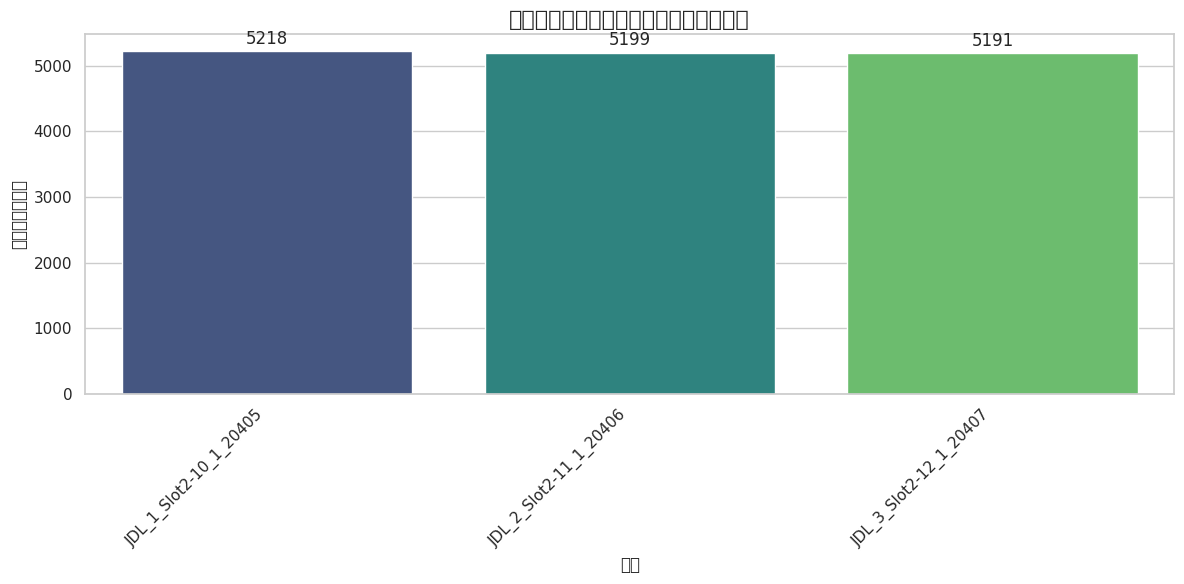

/tmp/ipykernel_1106/252043935.py:143: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(data=summary_stats, x='样本名称', y='peptide_count', palette='plasma')
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
/tmp/ipykernel_1106/252043935.py:151: UserWarning: Glyph

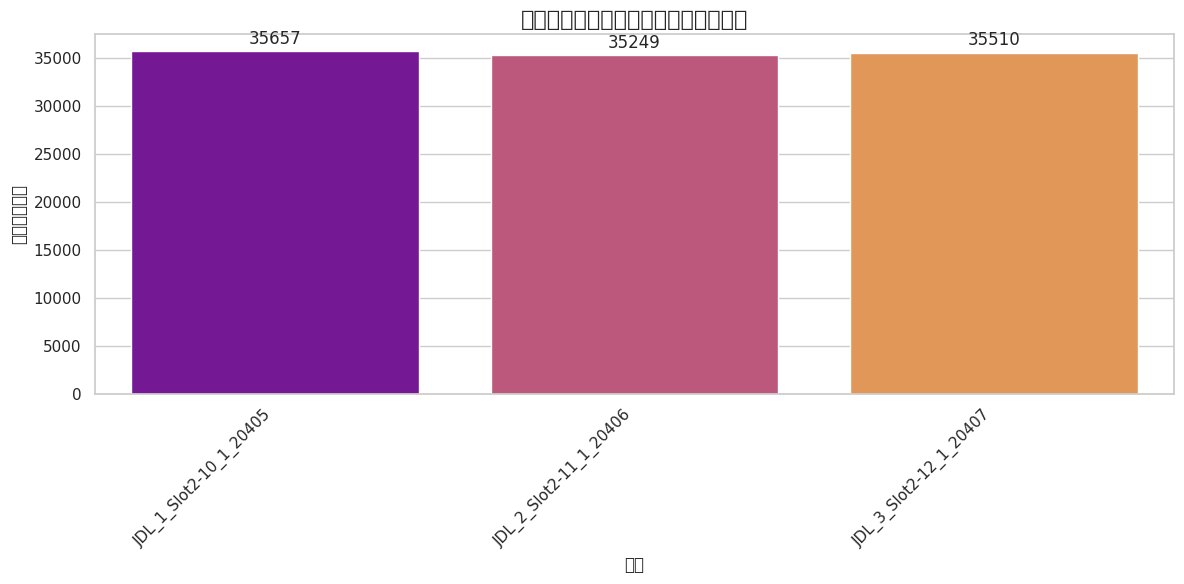

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
/home/judelong/miniconda3/envs/bioinfo/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 34507 (\N{CJK UNIFIED IDEOGRAPH-86CB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/judelong/miniconda3/envs/bioinfo/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 30333 (\N{CJK UNIFIED IDEOGRAPH-767D}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/judelong/miniconda3/envs/bioinfo/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 36136 (\N{CJK UNIFIED IDEOGRAPH-8D28}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/judelong/miniconda3/envs/bioinfo/lib/python3.12/site-packages/IPython/core/pylab


--- 正在尝试绘制韦恩图以展示ID重叠情况 ---


findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

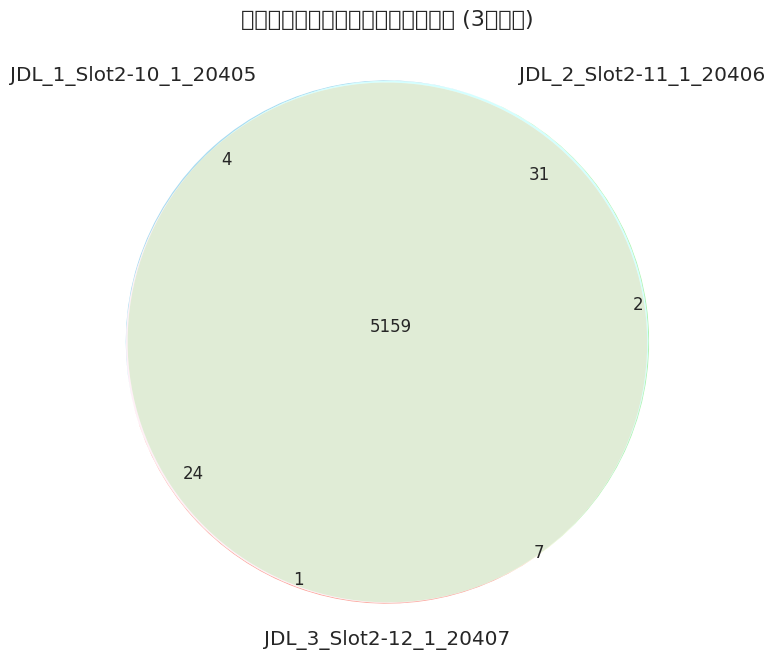

In [ ]:
# Cell 3: 调用函数进行分析

#定义白名单
group_a_whitelist = ['JDL_1_Slot2-10_1_20405',
                     'JDL_2_Slot2-11_1_20406',
                     'JDL_3_Slot2-12_1_20407'] 

# 调用我们自己定义的函数，把准备好的数据 df_filtered 传给它
summary_table = assess_reproducibility(dataframe=df_filtered, 
                                              sample_whitelist=group_a_whitelist,
                                              plot_title_prefix='小鼠肝脏样本',
                                              )

步骤1.3.2 蛋白质组定量重复性检验

（1）构建定量矩阵

In [21]:
import numpy as np
# --- 阶段 2.1: 构建定量矩阵 ---
print("--- 正在构建定量矩阵 ---")

# 使用 pivot_table 将长格式数据转换为宽格式
# index: 新表格的行
# columns: 新表格的列
# values: 新表格单元格中的值
quant_matrix = df_filtered.pivot_table(index='PG.ProteinGroups', 
                                       columns='R.FileName', 
                                       values='PG.Quantity')

# 对数据进行 Log2 转换，这是质谱数据分析的标准步骤
# Log2转换可以使数据更接近正态分布，并使上调/下调的倍数变化对称
quant_matrix_log2 = np.log2(quant_matrix)

print("定量矩阵构建完成！维度 (蛋白质数, 样本数):", quant_matrix_log2.shape)
print("预览 Log2 转换后的定量矩阵:")
display(quant_matrix_log2.head())

--- 正在构建定量矩阵 ---
定量矩阵构建完成！维度 (蛋白质数, 样本数): (5228, 3)
预览 Log2 转换后的定量矩阵:


R.FileName,JDL_1_Slot2-10_1_20405,JDL_2_Slot2-11_1_20406,JDL_3_Slot2-12_1_20407
PG.ProteinGroups,,,
A0A140LI88,8.349554,8.449642,8.622302
A2A432,9.260873,9.331447,9.425914
A2A4P0,5.192471,6.119213,4.707272
A2A5R2,8.199481,8.395624,8.141196
A2A690,8.614807,8.603131,8.726241


（2）样本间定量相关性热图

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

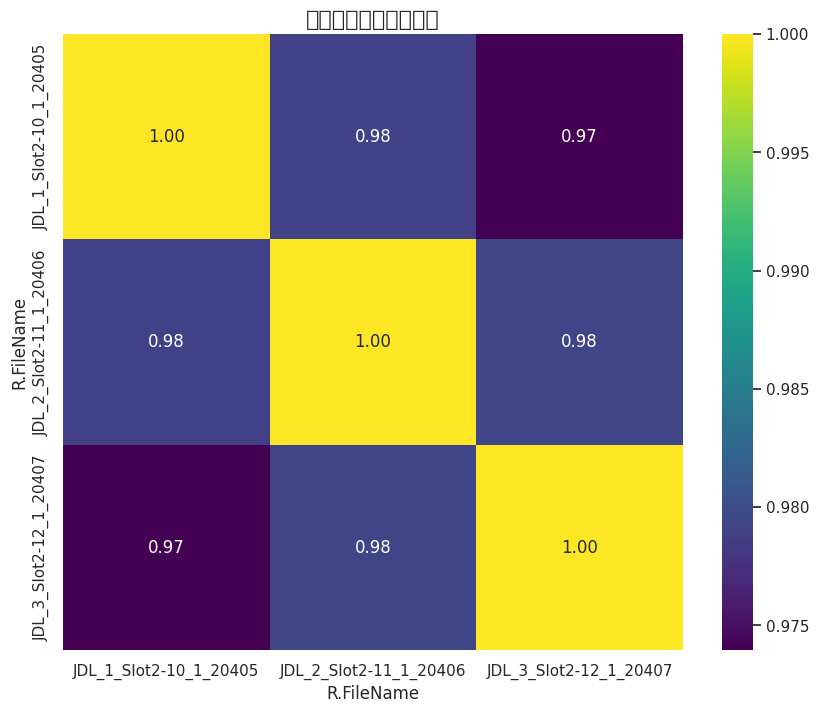

In [22]:
# 计算样本间的相关性矩阵
correlation_matrix = quant_matrix_log2.corr(method='pearson')

# 绘制热图
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix, 
    annot=True,          # 在格子上显示数值
    cmap='viridis',      # 选择一个漂亮的颜色主题
    fmt='.2f'            # 数值格式化，保留两位小数
)
plt.title('样本间定量相关性热图', fontsize=16)
plt.show()

（3）主成分分析

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

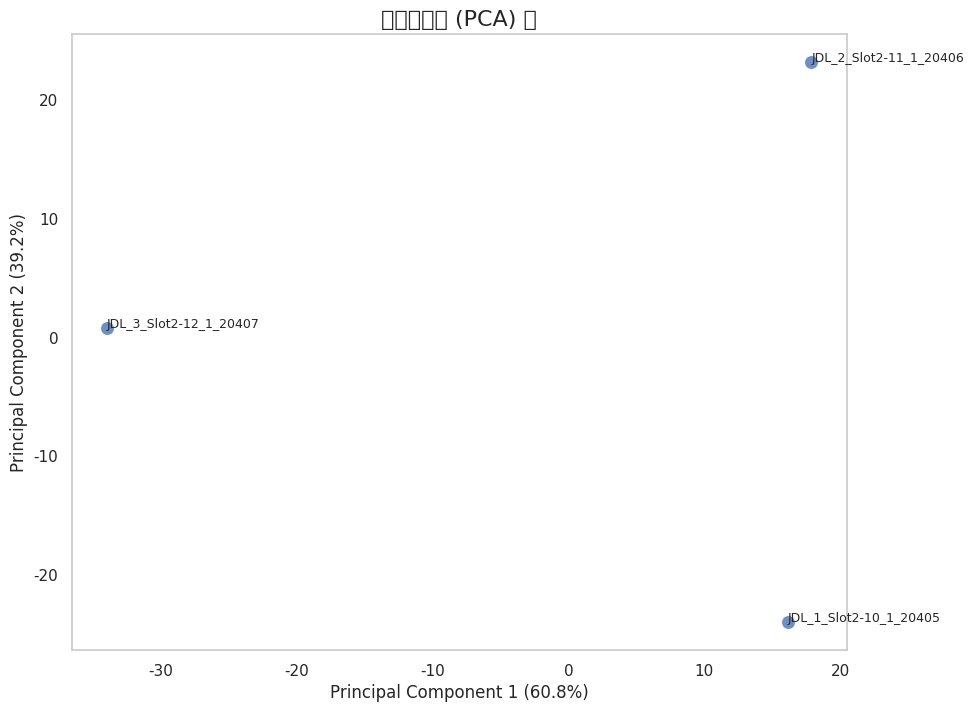

In [23]:
from sklearn.decomposition import PCA

# PCA分析前，需要处理缺失值。这里我们用0填充，表示未检测到。
# 注意：更复杂的填充策略（如插补）在差异分析时更常用。对于PCA，简单填充即可。
df_pca_input = quant_matrix_log2.fillna(0)

# PCA要求样本在行，特征（蛋白质）在列，所以我们需要对矩阵进行转置 (.T)
pca_data = df_pca_input.T

# 创建并拟合PCA模型
pca = PCA(n_components=2) # 我们只关心前两个主成分
principal_components = pca.fit_transform(pca_data)

# 将结果转换为DataFrame方便绘图
pca_df = pd.DataFrame(data=principal_components, 
                      columns=['PC1', 'PC2'], 
                      index=pca_data.index)

# 获取每个主成分的方差解释率，用于图表标签
variance_explained = pca.explained_variance_ratio_

# 绘制PCA图
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='PC1', 
    y='PC2', 
    data=pca_df,
    s=100, # 点的大小
    alpha=0.8
)

# 为每个点添加标签
for sample in pca_df.index:
    plt.text(pca_df.loc[sample, 'PC1'] + 0.02, 
             pca_df.loc[sample, 'PC2'], 
             sample, 
             fontsize=9)

plt.xlabel(f'Principal Component 1 ({variance_explained[0]*100:.1f}%)')
plt.ylabel(f'Principal Component 2 ({variance_explained[1]*100:.1f}%)')
plt.title('主成分分析 (PCA) 图', fontsize=16)
plt.grid()
plt.show()

（4）定量分布箱线图

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
/home/judelong/miniconda3/envs/bioinfo/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 26679 (\N{CJK UNIFIED IDEOGRAPH-6837}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/judelong/miniconda3/envs/bioinfo/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 26412 (\N{C

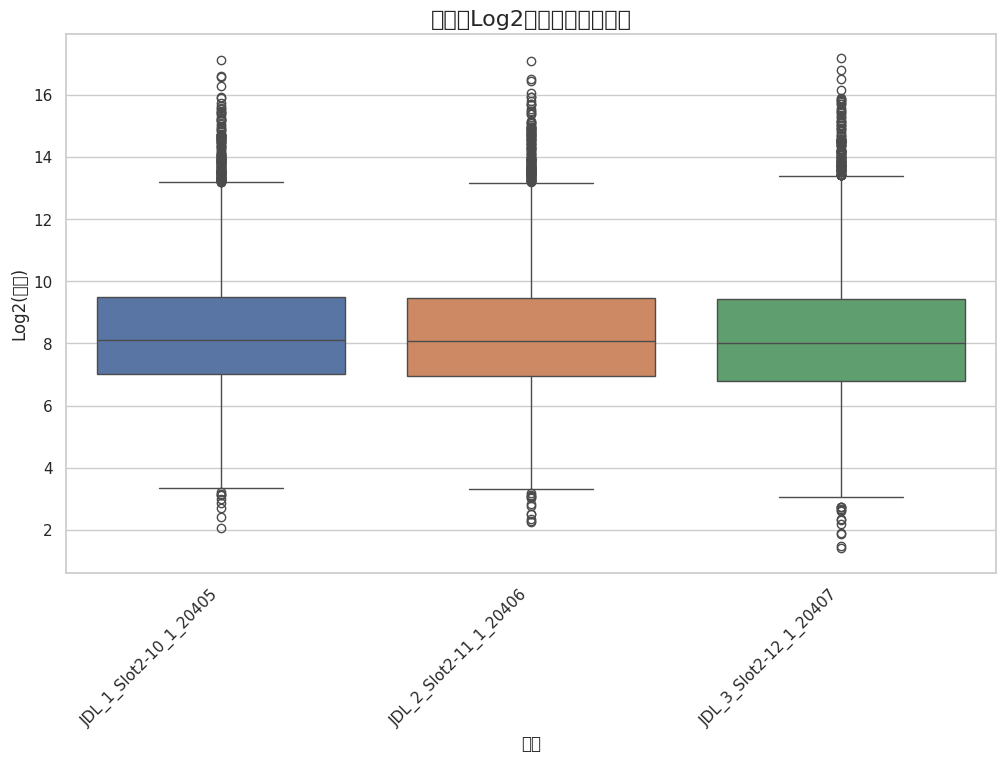

In [24]:
plt.figure(figsize=(12, 7))
sns.boxplot(data=quant_matrix_log2)
plt.title('各样本Log2定量值分布箱线图', fontsize=16)
plt.ylabel('Log2(丰度)', fontsize=12)
plt.xlabel('样本', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()